# City of Chicago Narcotics 

### By: Julia Farson

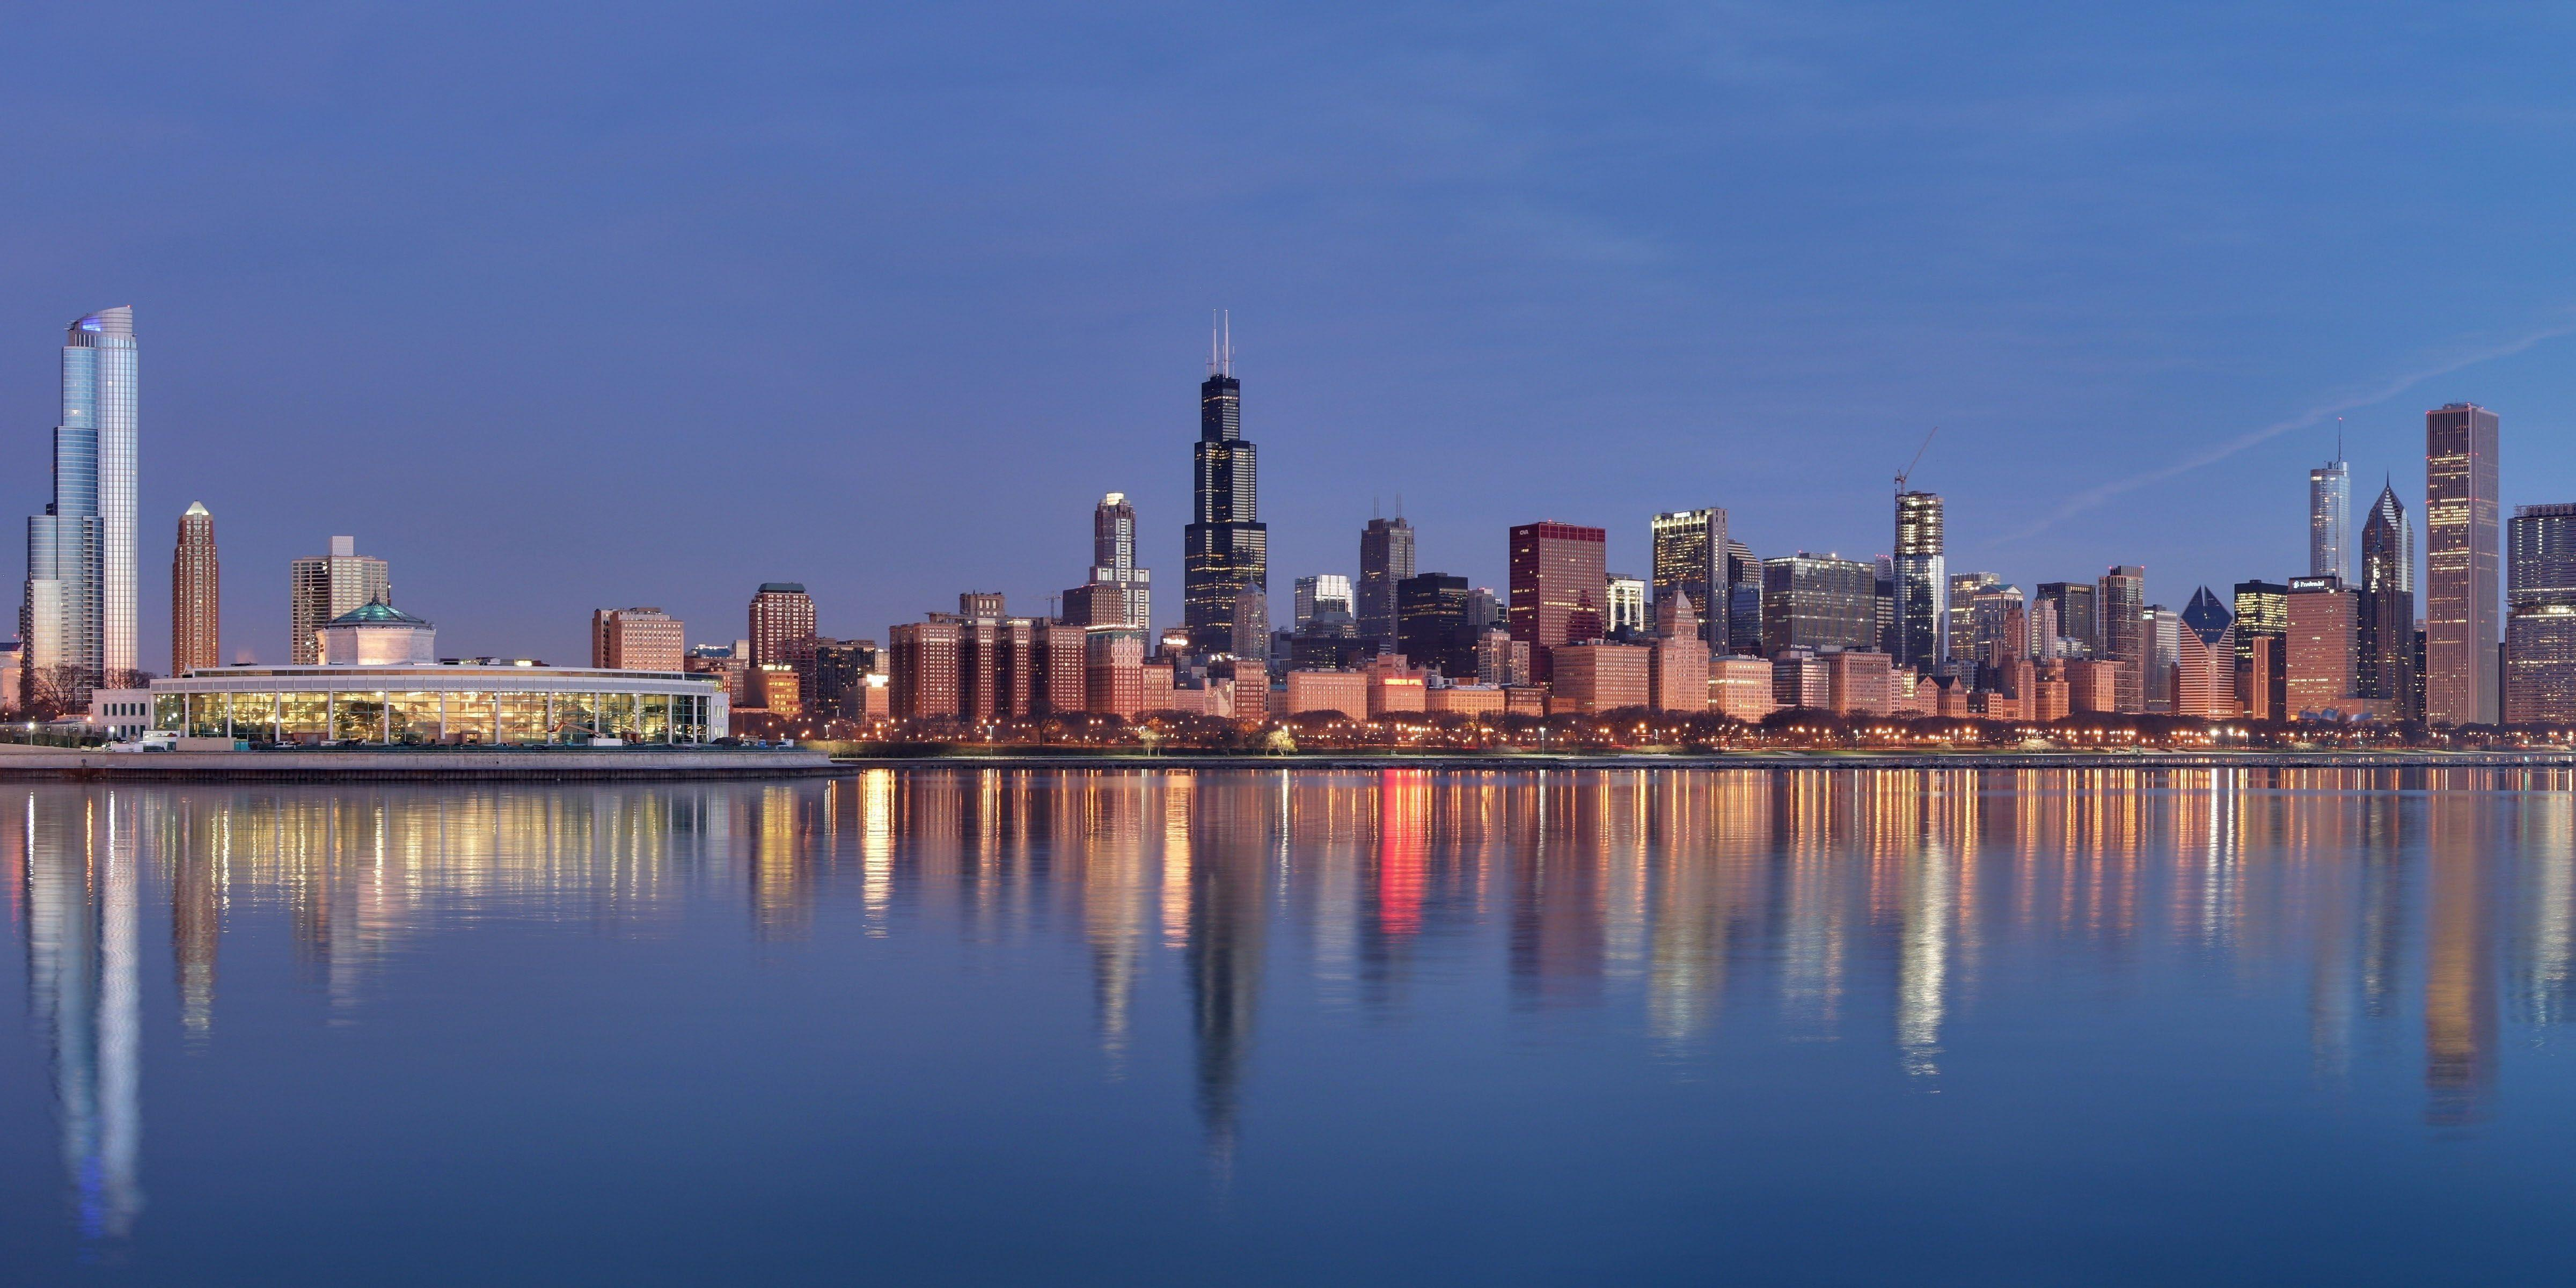

In [51]:
from IPython.display import Image
Image(filename=r'C:\Users\jfars\OneDrive\Desktop\Chicago Crime\Chicago Crime\skyline.jpg')

# 1. Introduction

In this notebook I will be exploring Chicago Narcotic Crime Data taking place from 2005 through 2017. I am interested in looking at Chicago Narcotic Crimes to answer the following questions:

* What narcotics make up the majority of Chicago narcotic crime?
* How has narcotic related crime changed over the years? Has it increased/decreased?
* What days of the week and months of the year have the highest amount of narcotic related crimes?
* What Chicago neighborhoods have the highest incidences of narcotic related crimes?

Answering the above questions can help Chicago law enforcement better understand patterns and trends in narcotic related crimes. 

# 2. Importing and Cleaning Data

To begin my exploratory data analysis process, I imported the required packages needed to load, clean, and later visualize the data. 

In [1]:
import numpy as np 
import pandas as pd 
import re
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import folium
import plotly as px

Next I uploaded the Chicago Crime data sets. 

In [2]:
crime1 = pd.read_csv('C:/Users/jfars/OneDrive/Desktop/Chicago Crime/Chicago_Crimes_2005_to_2007.csv', on_bad_lines='skip')
crime2 = pd.read_csv('C:/Users/jfars/OneDrive/Desktop/Chicago Crime/Chicago_Crimes_2008_to_2011.csv', on_bad_lines='skip')
crime3 = pd.read_csv('C:/Users/jfars/OneDrive/Desktop/Chicago Crime/Chicago_Crimes_2012_to_2017.csv', on_bad_lines='skip')
boundary_data_path = ('C:/Users/jfars/OneDrive/Desktop/Chicago Crime/ChicagoBeats.geojson')

I began the data cleaning process by checking for duplicate and null values. 

In [3]:
crime1.duplicated().sum()
crime2.duplicated().sum()
crime3.duplicated().sum()

0

In [4]:
crime1.isnull().sum()
crime2.isnull().sum()
crime3.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 1
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1658
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                       14
Community Area             40
FBI Code                    0
X Coordinate            37083
Y Coordinate            37083
Year                        0
Updated On                  0
Latitude                37083
Longitude               37083
Location                37083
dtype: int64

Next I merged the data sets.

In [5]:
crime = pd.concat([crime1, crime2, crime3], ignore_index=False, axis = 0)

In [6]:
crime.head()

Unnamed: 0       ID Case Number                    Date  \
0           0  4673626    HM274058  04/02/2006 01:00:00 PM   
1           1  4673627    HM202199  02/26/2006 01:40:48 PM   
2           2  4673628    HM113861  01/08/2006 11:16:00 PM   
3           4  4673629    HM274049  04/05/2006 06:45:00 PM   
4           5  4673630    HM187120  02/17/2006 09:03:14 PM   

                 Block  IUCR   Primary Type                   Description  \
0    055XX N MANGO AVE  2825  OTHER OFFENSE       HARASSMENT BY TELEPHONE   
1   065XX S RHODES AVE  2017      NARCOTICS            MANU/DELIVER:CRACK   
2      013XX E 69TH ST  051A        ASSAULT           AGGRAVATED: HANDGUN   
3  061XX W NEWPORT AVE  0460        BATTERY                        SIMPLE   
4      037XX W 60TH ST  1811      NARCOTICS  POSS: CANNABIS 30GMS OR LESS   

  Location Description  Arrest  ...  Ward  Community Area  FBI Code  \
0            RESIDENCE   False  ...  45.0            11.0        26   
1             SIDEWALK    True  ...  20.0            42.0        18   
2                OTHER   False  ...   5.0            69.0       04A   
3            RESIDENCE   False  ...  38.0            17.0       08B   
4                ALLEY    True  ...  13.0            65.0        18   

   X Coordinate  Y Coordinate  Year              Updated On   Latitude  \
0     1136872.0     1936499.0  2006  04/15/2016 08:55:02 AM  41.981913   
1     1181027.0     1861693.0  2006  04/15/2016 08:55:02 AM  41.775733   
2     1186023.0     1859609.0  2006  04/15/2016 08:55:02 AM  41.769897   
3     1134772.0     1922299.0  2006  04/15/2016 08:55:02 AM  41.942984   
4     1152412.0     1864560.0  2006  04/15/2016 08:55:02 AM  41.784211   

   Longitude                       Location  
0 -87.771996  (41.981912692, -87.771996382)  
1 -87.611920  (41.775732538, -87.611919814)  
2 -87.593671  (41.769897392, -87.593670899)  
3 -87.780057  (41.942984005, -87.780056951)  
4 -87.716745   (41.784210853, -87.71674491)  

[5 rows x 23 columns]

I converted the Date column to the proper date-time format and double checked that the changes were made. 

In [7]:
crime.Date = pd.to_datetime(crime.Date, format='%m/%d/%Y %I:%M:%S %p')

crime.index = pd.DatetimeIndex(crime.Date)

In [8]:
print(crime.dtypes)

Unnamed: 0                       int64
ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                       float64
Ward                           float64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object


# 3. Analysis and Visualizations 

Next I began the analysis process by filtering the data based on crime type. 

In [9]:
pie_chart = crime.groupby([crime['Primary Type']]).size().reset_index(name = 'size') 
pie_chart.head(50)

Primary Type     size
0                               ARSON     9269
1                             ASSAULT   360244
2                             BATTERY  1079178
3                            BURGLARY   369056
4   CONCEALED CARRY LICENSE VIOLATION       90
5                 CRIM SEXUAL ASSAULT    22789
6                     CRIMINAL DAMAGE   702702
7                   CRIMINAL TRESPASS   171596
8                  DECEPTIVE PRACTICE   225180
9                            GAMBLING    14755
10                           HOMICIDE     5879
11                  HUMAN TRAFFICKING       28
12   INTERFERENCE WITH PUBLIC OFFICER    14009
13                       INTIMIDATION     3324
14                         KIDNAPPING     4734
15               LIQUOR LAW VIOLATION    12129
16                MOTOR VEHICLE THEFT   271624
17                          NARCOTICS   674831
18                     NON - CRIMINAL       38
19                       NON-CRIMINAL       96
20   NON-CRIMINAL (SUBJECT SPECIFIED)        4
21                          OBSCENITY      422
22         OFFENSE INVOLVING CHILDREN    40260
23           OTHER NARCOTIC VIOLATION      122
24                      OTHER OFFENSE   368169
25                       PROSTITUTION    60735
26                   PUBLIC INDECENCY      134
27             PUBLIC PEACE VIOLATION    48403
28                          RITUALISM       16
29                            ROBBERY   229467
30                        SEX OFFENSE    20172
31                           STALKING     2866
32                              THEFT  1245111
33                  WEAPONS VIOLATION    60335

In [10]:
plt.figure(figsize=(15,15))
pie_draw = pie_chart.copy()
pie_draw.loc[pie_draw['size'] < 65000, 'Primary Type'] = 'OTHER OFFENSE'
pie_draw = pie_draw.groupby('Primary Type')['size'].sum().sort_values(ascending=True)
pie_draw.head(50)



Primary Type
CRIMINAL TRESPASS       171596
DECEPTIVE PRACTICE      225180
ROBBERY                 229467
MOTOR VEHICLE THEFT     271624
ASSAULT                 360244
BURGLARY                369056
NARCOTICS               674831
OTHER OFFENSE           688778
CRIMINAL DAMAGE         702702
BATTERY                1079178
THEFT                  1245111
Name: size, dtype: int64

<Figure size 1080x1080 with 0 Axes>

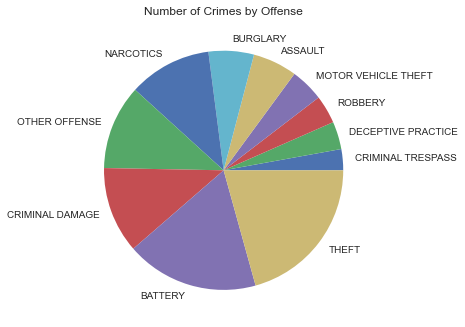

In [11]:
pie_draw.plot(kind='pie')
plt.title('Number of Crimes by Offense')
plt.ylabel('')
plt.xlabel('')
plt.show()

The visual above shows that the top five crimes include theft, battery, criminal damage, narcotics, and burglary. 

To take a closer look at narcotic crimes, I created a new data frame to look at the amount of  narcotic crimes by substance. 

In [12]:
narcotics_df = crime[crime['Primary Type'].str.contains('Narcotics', flags = re.IGNORECASE)]

In [13]:
narcotics_df.Date = pd.to_datetime(narcotics_df.Date, format='%m/%d/%Y %I:%M:%S %p')

narcotics_df.index = pd.DatetimeIndex(narcotics_df.Date)

C:\Users\jfars\AppData\Local\Temp\ipykernel_6008\4041281639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  narcotics_df.Date = pd.to_datetime(narcotics_df.Date, format='%m/%d/%Y %I:%M:%S %p')


In [14]:
narcotics_df.head(30)

Unnamed: 0       ID Case Number                Date  \
Date                                                                       
2006-02-26 13:40:48           1  4673627    HM202199 2006-02-26 13:40:48   
2006-02-17 21:03:14           5  4673630    HM187120 2006-02-17 21:03:14   
2006-02-26 14:47:21          14  4673642    HM202299 2006-02-26 14:47:21   
2006-02-17 21:26:33          16  4673644    HM187135 2006-02-17 21:26:33   
2006-02-17 21:49:21          22  4673651    HM187138 2006-02-17 21:49:21   
2006-02-17 22:07:09          29  4673658    HM187164 2006-02-17 22:07:09   
2006-02-17 22:15:18          34  4673665    HM187180 2006-02-17 22:15:18   
2006-02-17 18:46:23          43  4673677    HM186846 2006-02-17 18:46:23   
2006-02-17 19:14:31          50  4673687    HM186978 2006-02-17 19:14:31   
2006-02-26 14:46:14          55  4673697    HM202338 2006-02-26 14:46:14   
2006-02-17 21:15:00          56  4673698    HM187131 2006-02-17 21:15:00   
2006-02-26 16:37:05          60  4673710    HM202472 2006-02-26 16:37:05   
2006-02-27 13:41:15          62  4673713    HM203888 2006-02-27 13:41:15   
2006-02-17 22:24:43          65  4673718    HM187194 2006-02-17 22:24:43   
2006-02-04 23:50:00          66  4673719    HM163908 2006-02-04 23:50:00   
2006-02-27 13:45:00          67  4673720    HM203894 2006-02-27 13:45:00   
2006-02-05 00:17:00          72  4673729    HM163918 2006-02-05 00:17:00   
2006-02-27 14:42:00          75  4673731    HM203954 2006-02-27 14:42:00   
2006-02-17 22:26:00          76  4673733    HM187197 2006-02-17 22:26:00   
2006-02-04 23:40:00          81  4673739    HM163936 2006-02-04 23:40:00   
2006-02-16 22:40:13          87  4673749    HM185387 2006-02-16 22:40:13   
2006-02-05 00:40:00          88  4673751    HM163961 2006-02-05 00:40:00   
2006-02-05 00:45:00          96  4673760    HM163966 2006-02-05 00:45:00   
2006-02-16 22:30:33         102  4673768    HM185420 2006-02-16 22:30:33   
2006-02-05 01:00:00         103  4673769    HM163968 2006-02-05 01:00:00   
2006-03-01 09:15:00         104  4673770    HM207095 2006-03-01 09:15:00   
2006-02-17 17:49:37         109  4673777    HM186741 2006-02-17 17:49:37   
2006-03-01 22:49:17         112  4673782    HM208504 2006-03-01 22:49:17   
2006-02-05 01:23:27         116  4673790    HM163985 2006-02-05 01:23:27   
2006-02-17 16:00:00         120  4673795    HM186779 2006-02-17 16:00:00   

                                                   Block  IUCR Primary Type  \
Date                                                                          
2006-02-26 13:40:48                   065XX S RHODES AVE  2017    NARCOTICS   
2006-02-17 21:03:14                      037XX W 60TH ST  1811    NARCOTICS   
2006-02-26 14:47:21               002XX S LEAMINGTON AVE  1811    NARCOTICS   
2006-02-17 21:26:33                052XX S FAIRFIELD AVE  1811    NARCOTICS   
2006-02-17 21:49:21                      025XX W 63RD ST  1811    NARCOTICS   
2006-02-17 22:07:09                      013XX W 99TH ST  1811    NARCOTICS   
2006-02-17 22:15:18                 104XX S MARYLAND AVE  1811    NARCOTICS   
2006-02-17 18:46:23                       061XX S MAY ST  1811    NARCOTICS   
2006-02-17 19:14:31                   053XX W MADISON ST  1811    NARCOTICS   
2006-02-26 14:46:14                  041XX N RICHMOND ST  2092    NARCOTICS   
2006-02-17 21:15:00                015XX S SPAULDING AVE  1811    NARCOTICS   
2006-02-26 16:37:05                   034XX N HALSTED ST  2027    NARCOTICS   
2006-02-27 13:41:15                  047XX S WESTERN AVE  2090    NARCOTICS   
2006-02-17 22:24:43                 066XX S CAMPBELL AVE  1811    NARCOTICS   
2006-02-04 23:50:00                 007XX N LAVERGNE AVE  2027    NARCOTICS   
2006-02-27 13:45:00                   034XX W WILSON AVE  1811    NARCOTICS   
2006-02-05 00:17:00                    013XX S HOMAN AVE  2027    NARCOTICS   
2006-02-27 14:42:00                  0000X N LATROBE AVE  2024    NARCOTICS   
2006-02-

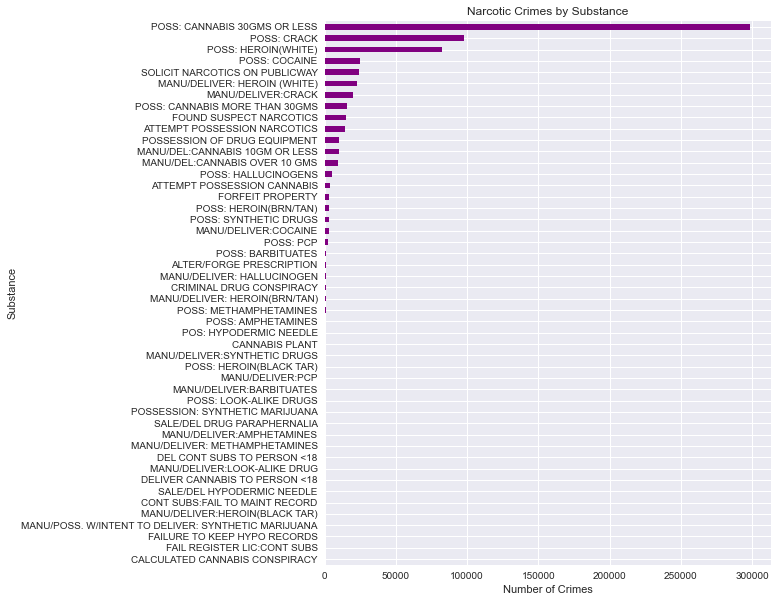

In [15]:
plt.figure(figsize=(8,10))
narcotics_df.groupby([narcotics_df['Description']]).size().sort_values(ascending=True).plot(kind='barh',color = 'purple')
plt.title('Narcotic Crimes by Substance')
plt.ylabel('Substance')
plt.xlabel('Number of Crimes')
plt.show()

The visual above shows that possession of cannabis (30 mg or less), possesion of crack, possesion of heroine (white), and possession of cocaine are the highest number of drug related crimes in Chicago. 

I then explored how narcotic related crimes have changed throughout the years.

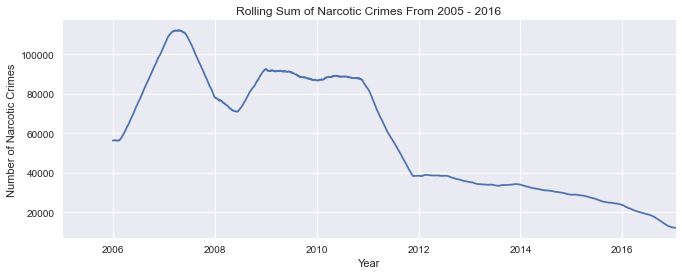

In [16]:
plt.figure(figsize=(11,4))
narcotics_df.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling Sum of Narcotic Crimes From 2005 - 2016')
plt.ylabel('Number of Narcotic Crimes')
plt.xlabel('Year')
plt.show()

The visual shows a spike in narcotic crimes between 2006 and 2008 followed by a decline into 2009. Narcotic related crimes increased again between 2009 and 2010 then drastically began to decline between 2011 and 2012 followed by a gradual decline. 

I viewed if more narcotic crimes took place on certain days of the week. 

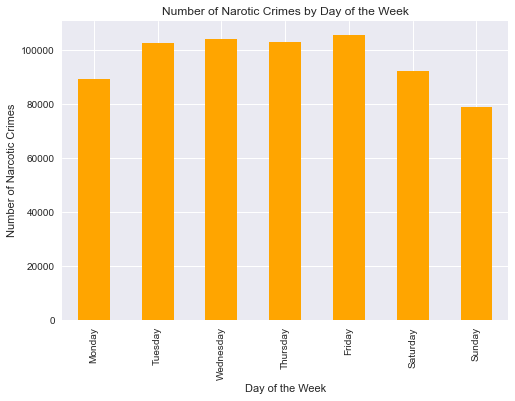

In [17]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
narcotics_df.groupby([narcotics_df.index.dayofweek]).size().plot(kind='bar', color = 'orange')
plt.ylabel('Number of Narcotic Crimes')
plt.xticks(np.arange(7), days)
plt.xlabel('Day of the Week')
plt.title('Number of Narotic Crimes by Day of the Week')
plt.show() 

The visual above shows that the least amount of narcotic crime took place on Sundays and Mondays. Most crime took place on Friday.

I alos reviewed narcotic crime by month to identify if certain months had more instances of drug related crimes compared to other months. 

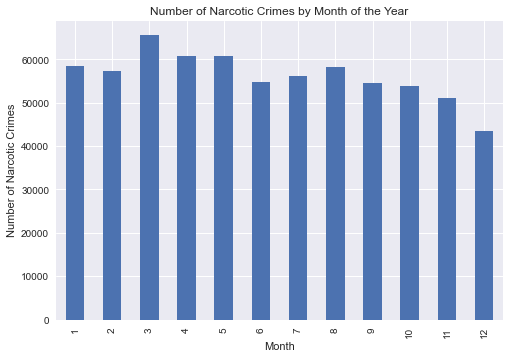

In [18]:
narcotics_df.groupby([narcotics_df.index.month]).size().plot(kind='bar')
plt.ylabel('Number of Narcotic Crimes')
plt.xlabel('Month')
plt.title('Number of Narcotic Crimes by Month of the Year')
plt.show()

Based on the graph above, narcotic related crimes tend to peak in the spring from March through May. 

I then looked at the amount of narcotic related crimes based on beat to determine which Chicago neighborhoods had the highest amount of narcotic crimes per police patroling area. 

In [19]:
crimedata2 = pd.DataFrame(crime['Beat'].value_counts().astype(float))

crimedata2.head()


Beat
423   48679.0
421   47041.0
624   44943.0
1533  42592.0
511   42098.0

In [20]:
def create_cpmap(source_df, geojson_path, source_column, geo_column, series_name, label_name):
    source_df = source_df.reset_index()
    source_df.columns = ["District", "Number"]
    source_df[source_column] = source_df['District'].apply(str)
    source_df[source_column] = source_df[source_column].str.zfill(4)
    
    m = folium.Map(location = [41.87, -87.62], zoom_start=10)

    cp = folium.Choropleth(
        geo_data = geojson_path,
        name = 'choropleth',
        data = source_df,
        columns = [source_column, 'Number'],
        key_on = f'feature.properties.{geo_column}',
        fill_color = "YlOrRd",
        fill_opacity = 0.7,
        line_opacity = .1,
        nan_fill_color ="YlOrRd",
        nan_fill_opacity = .1, 
        legend_name = 'Number of Narcotic Crimes', 

    ).add_to(m)

    index_source = source_df.set_index(source_column)
    for s in cp.geojson.data['features']:
        current_beat = s['properties'] [geo_column] 
        if current_beat in index_source.index:
            s['properties'] [label_name] =  index_source.loc[current_beat, 'Number'] 
        s['properties'] [series_name] = current_beat
    folium.GeoJsonTooltip([series_name, label_name]).add_to(cp.geojson)
    display(m)

In [21]:
create_cpmap(crimedata2, boundary_data_path, 'Beat', 'beat_num', 'Police Beat', 'Number of Crimes')

The map shows that police beats 0511, 0423, 0421, 0624, 0822, and 1533 have the highest number of narcotic related crimes in Chicago. 

Next I analyzed drug related crime based on hard drugs. I filtered out cannabis related charges due to cannabis being considered a soft drug.

In [22]:
crime_data4 = crime[crime['Primary Type'].str.contains('Narcotics', flags = re.IGNORECASE)]

crime_data5 = crime_data4[crime_data4['Description'].str.contains('Cannabis', flags = re.IGNORECASE)== False]

crime_data5 = pd.DataFrame(crime_data5['Beat'].value_counts().astype(float))

In [23]:
create_cpmap(crime_data5, boundary_data_path, 'Beat', 'beat_num', 'Police Beat', 'Number of Crimes')

The map above shows a drastic change in number of narcotic crimes. In this map only hard drugs are anaylzed. Police beat 1533, 1531, and 1121 have the most hard drug related crimes. 

# 4. Conclusion

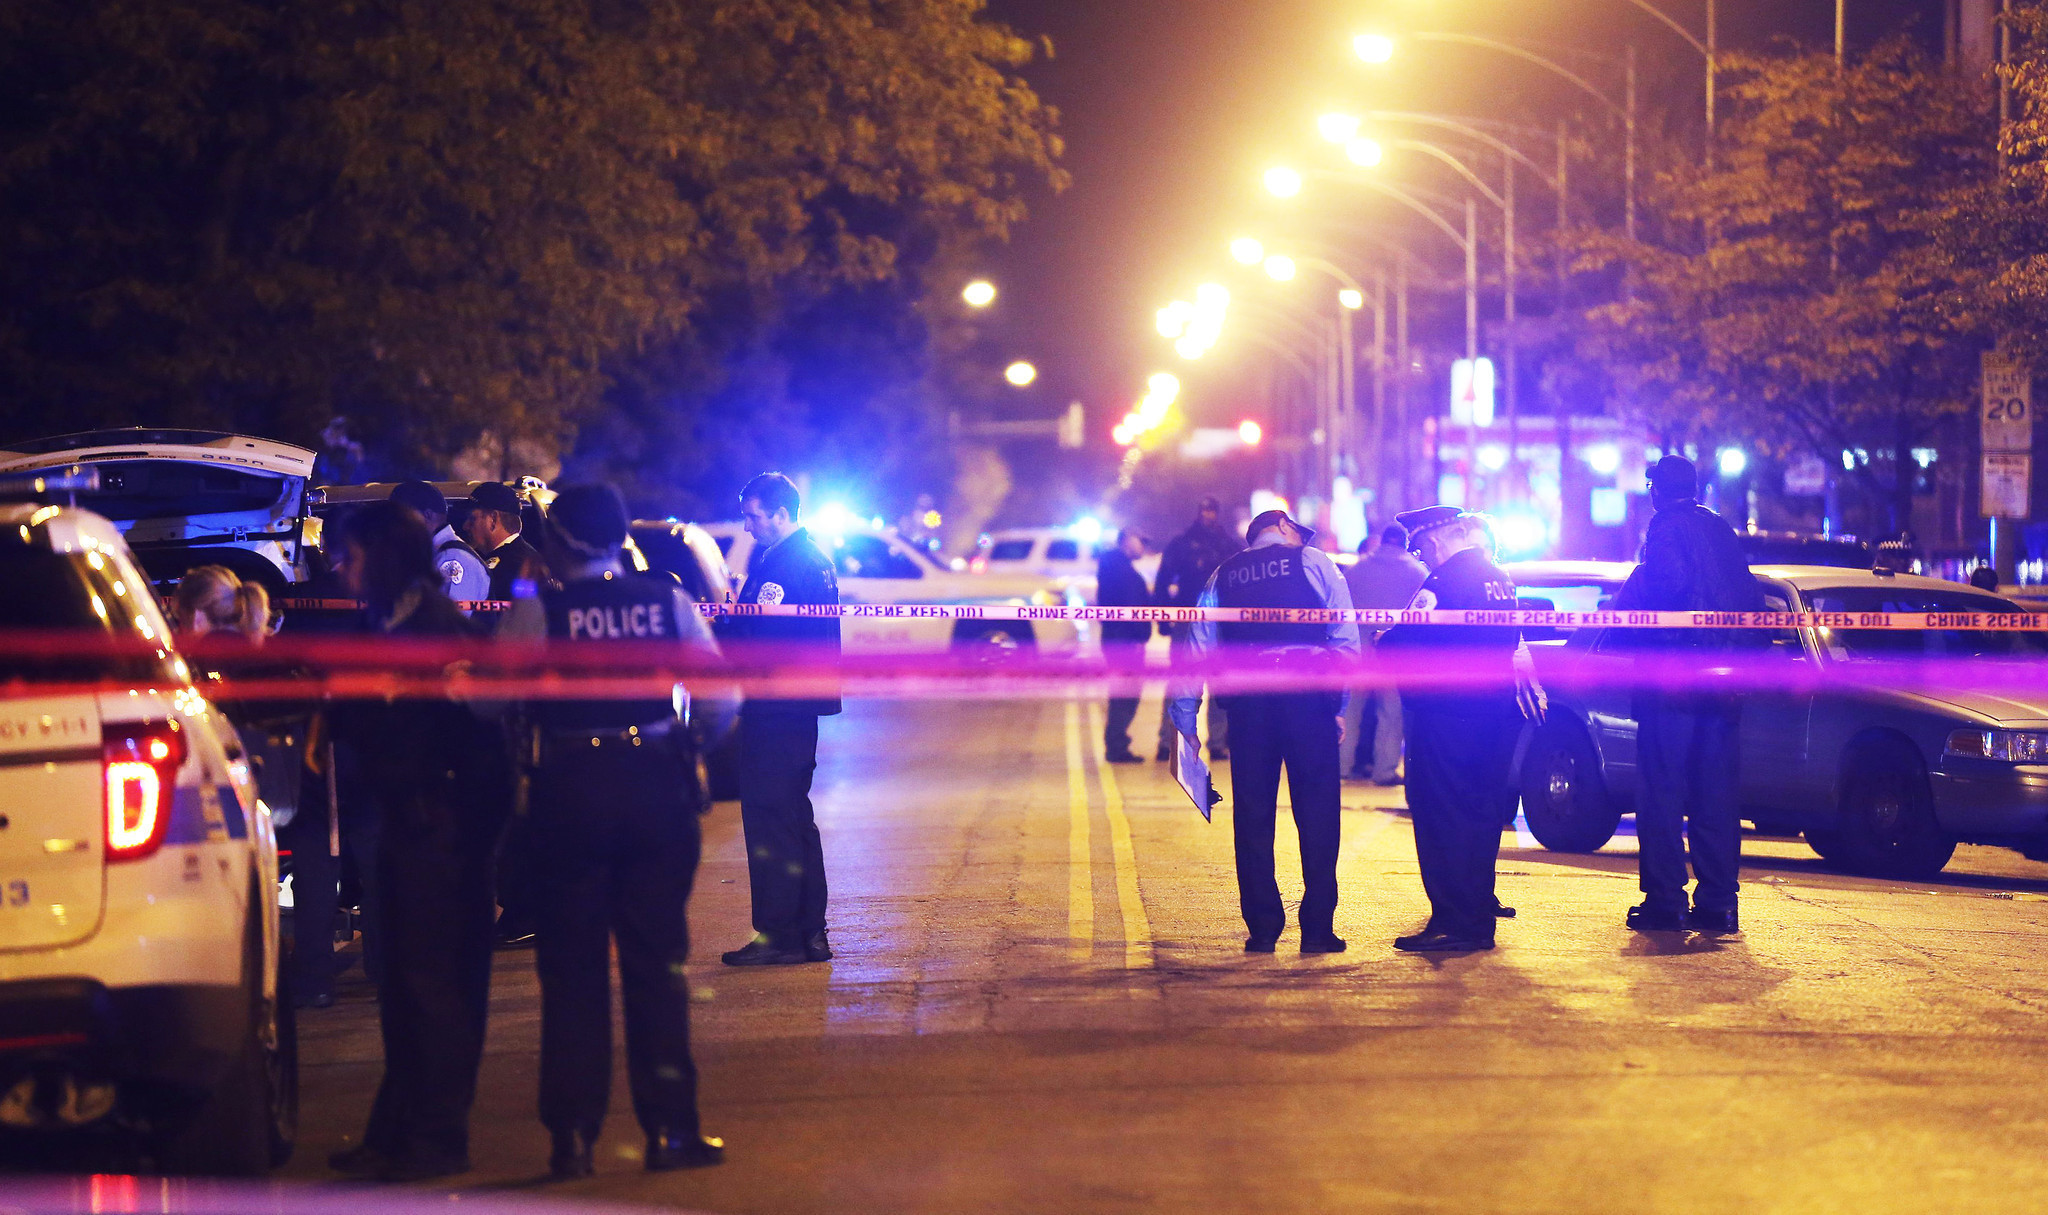

In [52]:
Image(filename=r'C:\Users\jfars\OneDrive\Desktop\Chicago Crime\Chicago Crime\chicagopolice.jpg')

Based on my analysis, 

I have found that the highest number of narcotic related crimes between 2005 and 2017 included the possession of cannbis (30 mg or less), possession of crack, possession of heroine, and possession of cocaine. Posession of cannabis (30 mg or less) was the most documented crime.  

Narcotic crimes spiked between 2006 and 2008 followed by a decline into 2009. Narcotic related crimes increased again between 2009 and 2010 then drastically began to decline between 2011 and 2012. This was followed by a gradual decline up to 2016. The Compassionate Use of Medical Cannabis Program Act was passed in 2013 by Illinois Governor Pat Quinn. This act legalized medical marijuana in Illinois in absolute terms and was a pilot program to determine its safety, interest levels, and monetary considerations. The changes in laws and attitudes around cannabis at this time may contribute to the drastic decrease in number of total drug related crimes through out the years. 

Narcotic related crimes tend to peak in the spring from March through May. Most of the drug related crimes took place on Fridays with the least amount of drug related crimes occuring on Sundays and Mondays. 

Police beats 0511, 0423, 0421, 0624, 0822, and 1533 had the highest number of narcotic related crimes in Chicago with the inclusion of cannabis. Police beats 1533, 1521, and 1121 had the highest number of hard drug related crimes. Police officers patrolling within these territories can use the above information such as number of narcotic related crimes by time of day and month as well as the most found substances to better crack down on drug related crimes. 

Thank you for reading my notebook!!!

Regards,

Julia Farson